In [8]:
import pandas as pd
import numpy as np
import os

# 데이터 다운로드

In [7]:
!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz
!tar -xf data.tar.gz

--2022-03-22 14:18:17--  https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz
Resolving aistages-prod-server-public.s3.amazonaws.com (aistages-prod-server-public.s3.amazonaws.com)... 52.218.180.35
Connecting to aistages-prod-server-public.s3.amazonaws.com (aistages-prod-server-public.s3.amazonaws.com)|52.218.180.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33424489 (32M) [binary/octet-stream]
Saving to: ‘data.tar.gz.3’

data.tar.gz.3       100%[===================>]  31.88M  20.3MB/s    in 1.6s    

2022-03-22 14:18:19 (20.3 MB/s) - ‘data.tar.gz.3’ saved [33424489/33424489]

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.dropbox.attrs'
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.xattr.com.apple.quarantine'
tar: Ig

In [9]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# 1. 데이터별 기본정보 (타입, 결측치, 개수 등)

### train_df

In [8]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [9]:
train_df.info() # 모두 int형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [10]:
train_df.isnull().sum() # 결측치 없음

user    0
item    0
time    0
dtype: int64

In [15]:
print('train_df 길이: ', len(train_df)) #5154471
print('user 수: ', train_df['user'].nunique()) #31360
print('시청 item 수: ', train_df['item'].nunique()) #6807

train_df 길이:  5154471
user 수:  31360
시청 item 수:  6807


### title_data

In [39]:
title_data.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [40]:
title_data.info() #결측치 없음. 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


- item 수가 6807개이고 train_df에서 본 nunique한 item 수도 6807로, 리스트에 있는 모든 영화를 적어도 유저들이 한 번씩 보았다. (안 본 영화 없음)

In [55]:
# 중복 제목 영화가 있는지 체크
title_data[title_data['title'].duplicated(keep=False)]

,item,title
349,34048,War of the Worlds (2005)
1926,64997,War of the Worlds (2005)


- War of the Worlds라는 같은 영화가 3408, 64997이라는 item 넘버링으로 나뉘어져 있다. (차후 수정 방안 고민)

### year_data

In [5]:
year_data.head()

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923


In [6]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [7]:
print('가장 최근 영화 개봉 년도: ', max(year_data['year']))
print('가장 오래된 영화 개봉 년도: ', min(year_data['year']))
print('평균 영화 개봉 년도: ', np.mean(year_data['year']))

가장 최근 영화 개봉 년도:  2014
가장 오래된 영화 개봉 년도:  1922
평균 영화 개봉 년도:  1992.1747315781734


- year_data의 item은 6799인데 train_df의 nunique한 item수는 6807로 차이가 있다.
> year_data에 없는 영화 항목이 있다.

In [8]:
#year_data에 없는 영화 항목 찾기
train_year_merge = pd.merge(train_df, year_data, how='left', on='item')
train_year_merge[train_year_merge['year'].isnull()].item.value_counts() # 총 1832행

6987      763
3310      480
32898     183
7065      109
7243       78
119145     78
8511       71
6988       70
Name: item, dtype: int64

In [9]:
# title_data의 제목에 개봉년도가 있어서 이를 반영해서 year_data 수정하기
title_data[title_data['item'] == 6987].title.values

array(['Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)'],
      dtype=object)

In [10]:
# 수정 전
print(len(year_data))
print(year_data.tail(10))

6799
        item  year
6789  108928  2014
6790  112370  2014
6791  109846  2014
6792  113225  2014
6793  111743  2014
6794  114795  2014
6795  110771  2014
6796  112804  2014
6797  113378  2014
6798  109850  2014


In [11]:
# 확인하면서
#idx = 6988
#print(title_data[title_data['item'] == idx].title.values)
#print(year_data[year_data['item'] == idx])

In [12]:
# 8개밖에 안되어서 손코딩하기
year_data.loc[6799] = [6987, 1920]
year_data.loc[6800] = [3310, 1921]
year_data.loc[6801] = [32898, 1902]
year_data.loc[6802] = [7065, 1915]
year_data.loc[6803] = [7243, 1916]
year_data.loc[6804] = [119145, 2015]
year_data.loc[6805] = [8511, 1917]
year_data.loc[6806] = [6988, 1919]

In [13]:
# 수정 후 -> 다 채움
print(len(year_data))
print(year_data.tail(10))

6807
        item  year
6797  113378  2014
6798  109850  2014
6799    6987  1920
6800    3310  1921
6801   32898  1902
6802    7065  1915
6803    7243  1916
6804  119145  2015
6805    8511  1917
6806    6988  1919


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

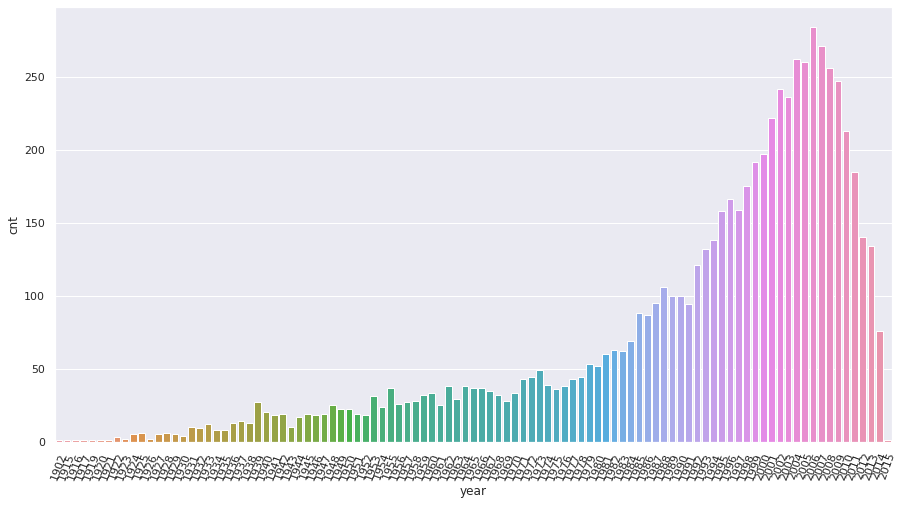

In [214]:
# 개봉 연도별 데이터 시각화
x = pd.DataFrame(year_data.groupby(['year']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x='year', y='cnt', data=x)#.barplot()
plt.xticks(rotation=70)

- 2000년 초에 많은 영화가 개봉함을 알 수 있다.

### director_data

In [73]:
director_data.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [74]:
director_data.info() # 자료형 확인, 결측치 없음, 5905

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [101]:
print('감독 수: ', director_data.director.nunique()) # 1340명의 영화 감독
print('감독 정보가 있는 영화 수: ', len(director_data)) # 5905개의 영화에 감독정보가 있음.

감독 수:  1340
감독 정보가 있는 영화 수:  5905


In [90]:
print('감독별 영화 제작 수 top5')
print(director_data['director'].value_counts().head()) # 최대 44
print('감독별 영화 제작 수 bottom5')
print(director_data['director'].value_counts().tail()) # 최소 2

감독별 영화 제작 수 top5
nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
Name: director, dtype: int64
감독별 영화 제작 수 bottom5
nm0404606    2
nm0405605    2
nm0410139    2
nm0410769    2
nm9054338    2
Name: director, dtype: int64


In [97]:
# 감독 정보가 없는 영화 수
print(title_data.item.nunique() - director_data['item'].nunique()) #1304
print(round((title_data.item.nunique()-director_data['item'].nunique())/len(title_data)*100,2),'%') #19.16%

1304
19.16 %


- 전체 영화 중 감독 정보가 없는 영화는 1304개이고 이는 전체 영화 중에서 약 19.16%를 차지한다.
> 생각보다 많은 비율이다. 모델링 시 감독 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 감독으로 대체할지 등을 고려하자.

### writer_data

In [102]:
writer_data.head()

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [103]:
writer_data.info() # 자료형 확인, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


In [105]:
print('작가 수: ', writer_data.writer.nunique()) # 2989명의 영화 작가
print('작가 정보가 있는 영화 수: ', len(writer_data)) # 11306개의 영화에 작가 정보가 있음.

작가 수:  2989
작가 정보가 있는 영화 수:  11306


In [106]:
print('작가별 영화 제작 수 top5')
print(writer_data['writer'].value_counts().head()) # 최대 47
print('작가별 영화 제작 수 bottom5')
print(writer_data['writer'].value_counts().tail()) # 최소 2

작가별 영화 제작 수 top5
nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
Name: writer, dtype: int64
작가별 영화 제작 수 bottom5
nm0414893    2
nm0414448    2
nm0414117    2
nm0414047    2
nm5927608    2
Name: writer, dtype: int64


In [107]:
# 작가 정보가 없는 영화 수
print(title_data.item.nunique() - writer_data['item'].nunique()) #1159
print(round((title_data.item.nunique()-writer_data['item'].nunique())/len(title_data)*100,2),'%') #17.03%

1159
17.03 %


- 전체 영화 중 작가 정보가 없는 영화는 1159개이고, 이는 전체 영화 중에서 약 17.03%를 차지한다.
> 영화 감독 정보와 마찬가지로 생각보다 많은 비율이라고 판단된다. 모델링 시 작가 정보를 그대로 반영할지, 평균이나 장르별 빈도수가 많은 작가로 대체할지 등을 고려하자.

### genre_data

In [109]:
genre_data.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [110]:
genre_data.info() #자료형 확인, 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [116]:
genre_data.item.nunique() #모든 영화에 대해 장르 정보가 다 있음.

6807

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


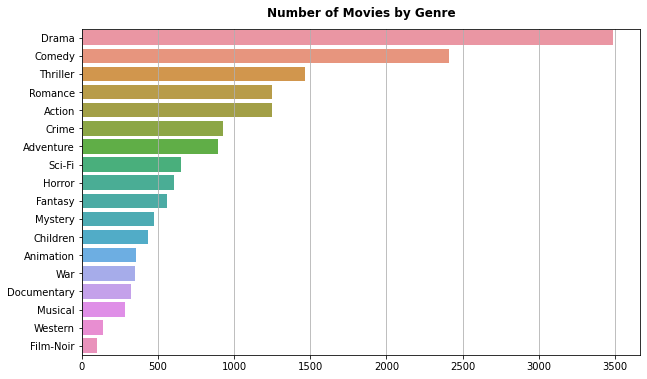

In [114]:
# 장르별 영화 개수 확인 (중복 허용)
import matplotlib.pyplot as plt
import seaborn as sns
num_genre = genre_data['genre'].value_counts()

fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- Drama가 압도적으로 많다. 한 영화당 여러 장르가 포함되는 중복인걸 감안하면, 웬만한 영화는 Drama에 속한 것으로 보인다.

In [132]:
gen_cnt_all = pd.DataFrame(genre_data.genre.value_counts()/title_data.item.nunique()*100)

In [133]:
gen_cnt_all

,genre
Drama,51.270751
Comedy,35.375349
Thriller,21.536653
Romance,18.378140
Action,18.304686
Crime,13.574262
Adventure,13.089467
Sci-Fi,9.593066
Horror,8.843837
Fantasy,8.182753


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


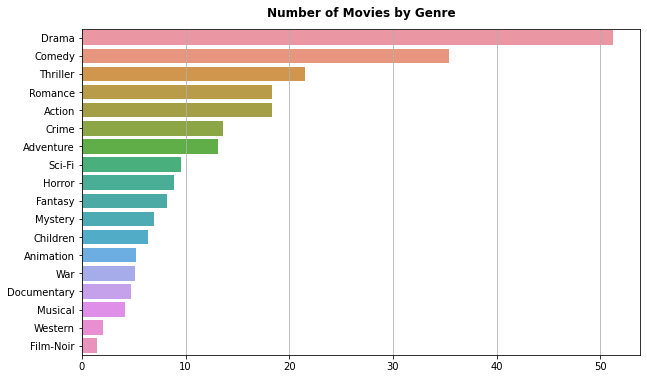

In [139]:
# 더 구체적으로, 전체 영화 개수에서의 각 장르별 영화 개수 비율을 확인해보자.
num_genre = genre_data.genre.value_counts()/title_data.item.nunique()*100
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(num_genre.values, num_genre.index, ax=ax)
ax.set_title("Number of Movies by Genre", fontsize="large", fontweight="bold", pad=12)
ax.grid(axis="x")

- (중복허용 감안하기) 전체 영화의 50% 이상이 Drama 장르에 속하고, 30%이상이 Comedy, 20%이상이 Thriller에 속한다.

# 2. 학습 데이터의 sparsity에 대해

#### 2.1 sparse ratio

In [145]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))
#special mission 코드 참고

Number of unique train users:  31360
Number of unique train items:  6807
Data sparsity ratio:  0.9758536052697853


- sparse 비율이 97%정도 된다.
> 사견) 난 굉장히 sparse하다고 보았는데, special mission 조교님께서 일반적인 추시 데이터셋에 비해 굉장히 dense한 데이터셋(행렬 상 이력이 많은 부분)라고 표현하셨다.

#### 2.2 실제 유저들이 영화 본 비율과 숫자

In [150]:
print(train_df.item.nunique())
print(title_data.item.nunique())

6807
6807


In [176]:
x = pd.DataFrame(train_df.groupby(['user']).size() / title_data.item.nunique(),
                 columns = ['item_cnt_ratio'])
x.describe()

,item_cnt_ratio
count,31360.000000
mean,0.024146
std,0.022037
min,0.002351
25%,0.010430
50%,0.016747
75%,0.029382
max,0.427795


In [177]:
train_df.groupby(['user']).size().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
dtype: float64

- 유저들은 전체 영화 목록 중 평균적으로 2.4%(164.3개),
 최대 42.7%(2912개), 최소 0.23%(16개)의 영화들을 보았다.

#### 2.3 같은 유저가 같은 영화를 재시청했는지

In [160]:
train_df[train_df[['user', 'item']].duplicated(keep=False)]
# 같은 유저의 재시청 기록 없음.

,user,item,time


# 3. 장르별 영화에 대해

#### 3.1 실제 유저가 많이 본 영화 장르 파악
- (위는 장르 데이터에서 진행. 이번엔 학습 데이터에서 진행)

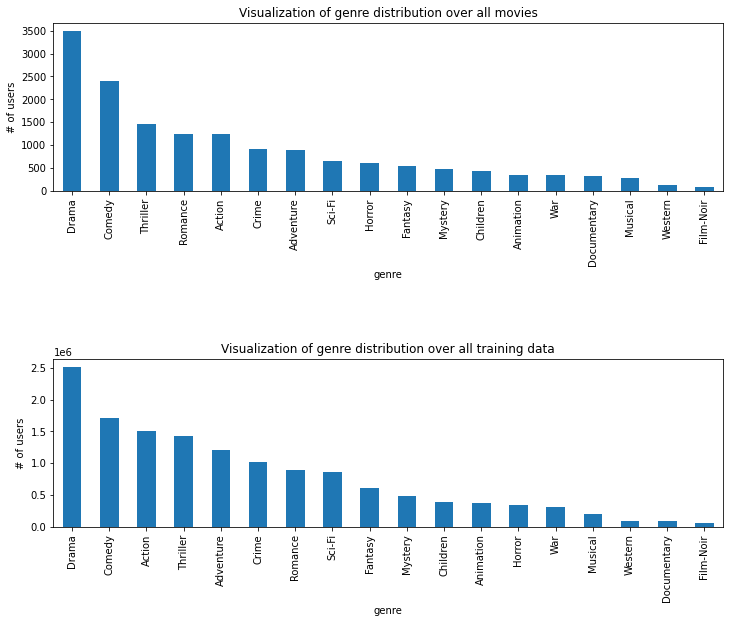

In [196]:
genre_df = pd.merge(train_df, genre_data, on=['item'])

plt.subplot(2,1,1)
genre_data['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_df['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=1.0, top=1.0)
# Special mission eda 코드 참고

- Action 영화 수가 Thriller나 Romance보다 적음에도 불구하고 유저들은 많이 보았다.
- Adventure도 영화 수에 비해 상대적으로 실제 유저들이 많이 보았다.
- Horror는 영화 수에 비해 상대적으로 실제 유저들이 적게 보았다.

### 3.2 영화별 최소와 최대 장르 수

In [199]:
genre_data.groupby(['item']).size().describe()

count    6807.000000
mean        2.340679
std         1.114049
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
dtype: float64

- 영화별 최소 장르는 1개, 최대 장르 수는 10개. 각 영화당 평균적으로 2.3개의 장르가 있다.

# 4. Time stamp에 따른 데이터 확인

In [14]:
train_df['time_date'] = pd.to_datetime(train_df['time'], unit='s')
train_df['time_year'] = train_df['time_date'].dt.year
train_df['time_month'] = train_df['time_date'].dt.month
train_df['time_hour'] = train_df['time_date'].dt.hour
train_df['time_day'] = train_df['time_date'].dt.dayofweek #무슨 요일인지
train_df.head()
# aistage 토론 게시판의 T3033님 코드 참고 (일은 안 중요해보여서 생략)
#https://stages.ai/competitions/179/discussion/talk/post/1195

,user,item,time,time_date,time_year,time_month,time_hour,time_day
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,4,3
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,4,3
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,4,3
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,4,3


### 4.1 년도, 월, 일, 시각별 본 영화 수

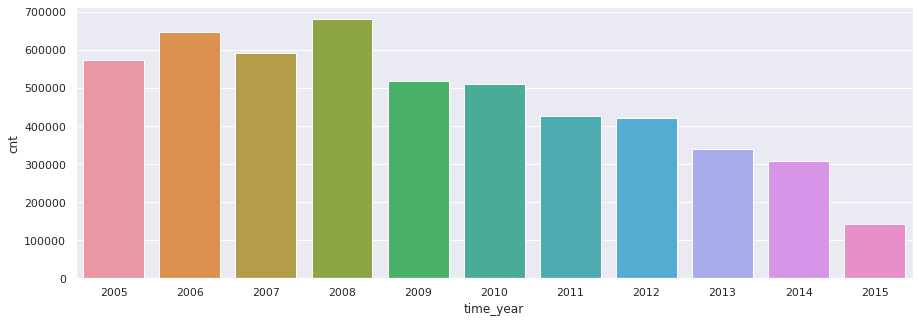

In [224]:
# 년도별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_year']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_year', y='cnt', data=x)#.barplot()

- 2009년 이후로 시청한 영화수가 줄어들고 있다.

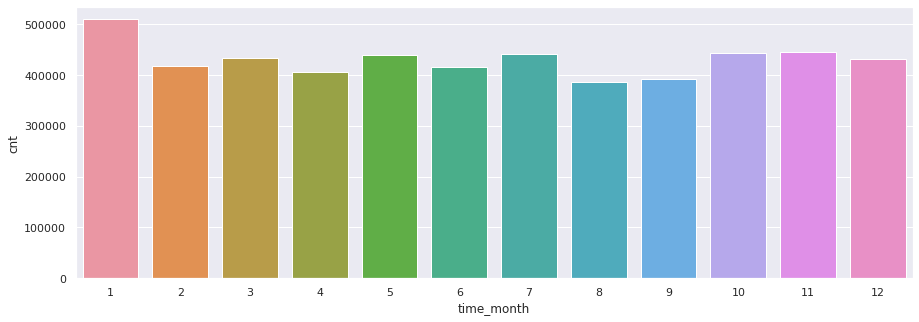

In [226]:
# 월별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_month']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_month', y='cnt', data=x)#.barplot()

- 연초인 1월에 휴일도 많아 영화 시청 횟수가 많아 보인다. 생각보다 고른 분포.

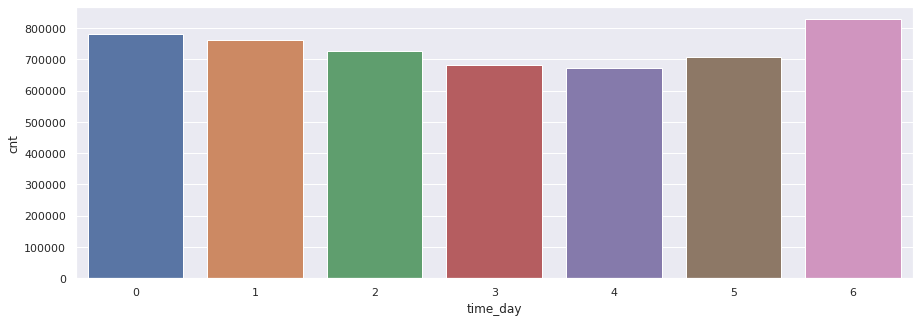

In [227]:
# 요일별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_day']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_day', y='cnt', data=x)#.barplot()

- 수요일(3), 목(4) 영화 시청 횟수가 다른 요일보다 적다.
- 월(0), 화(1), 수(2)가 주말인 토요일(5)보다 시청횟수가 많다.
- 일요일(6)이 영화 시청 횟수가 가장 많다.

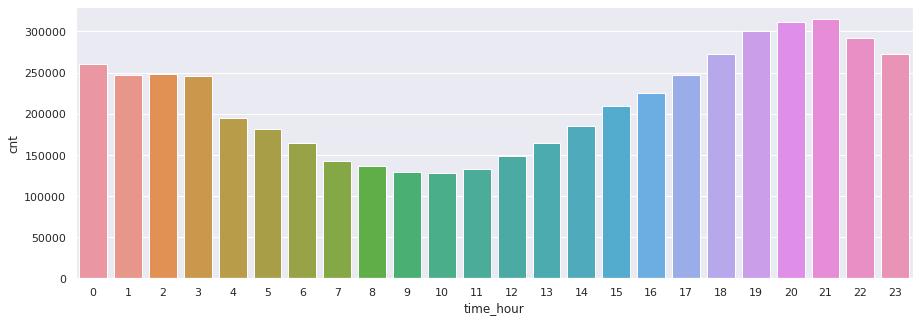

In [228]:
# 시각별 본 영화 수
x = pd.DataFrame(train_df.groupby(['time_hour']).size(), columns=['cnt']).reset_index()
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='time_hour', y='cnt', data=x)#.barplot()

- 새벽과 오전 시간대인 4~13시 사이에는 영화 시청 횟수가 비교적 적다.
- 저녁시간대인 18~이후가 영화 시청 횟수가 많다.

### 4.2 연도별 어떤 달에 많이 봤는지?

In [250]:
train_df['cnt'] =1 
x = pd.pivot_table(train_df, index=['time_year'], columns=['time_month'], 
               values='cnt', aggfunc=['sum'], fill_value=0)
x

sum                                                          \
time_month     1      2      3      4      5      6      7      8      9    
time_year                                                                   
2005            0      0      0  52261  85051  78259  67555  55438  58951   
2006        70201  53966  63331  57194  46316  47938  60621  45826  43594   
2007        66137  58468  54134  46700  47297  51400  53535  33226  36172   
2008        64348  51712  47734  42586  38311  44647  56467  53619  44774   
2009        63847  47013  55793  43121  43547  39863  38285  39433  37858   
2010        48883  36786  36814  36276  35115  37997  42416  48299  55620   
2011        46222  36416  41666  42221  38966  36809  33461  33746  29753   
2012        30470  36587  36632  34637  51708  31067  36119  30048  30639   
2013        37696  29427  30139  31186  29687  25538  28016  25105  35838   
2014        26373  22945  22818  20075  23162  21204  24460  21629  17756   
2015        54712  44037  43188      0      0      0      0      0      0   

                                 
time_month     10     11     12  
time_year                        
2005        57174  62195  56010  
2006        52679  45137  60437  
2007        46066  46378  50432  
2008        97398  82306  55367  
2009        36868  35092  36646  
2010        48843  43333  40003  
2011        29778  30106  27959  
2012        31841  34840  37354  
2013        19435  21729  24313  
2014        22228  42893  42738  
2015            0      0      0

In [240]:
maxValueIndex = x.idxmax(axis = 1)
pd.DataFrame(maxValueIndex)

,0
time_year,
2005,"(sum, 5)"
2006,"(sum, 1)"
2007,"(sum, 1)"
2008,"(sum, 10)"
2009,"(sum, 1)"
2010,"(sum, 9)"
2011,"(sum, 1)"
2012,"(sum, 5)"
2013,"(sum, 1)"


- 대체적으로 1월이 가장 많아보인다.

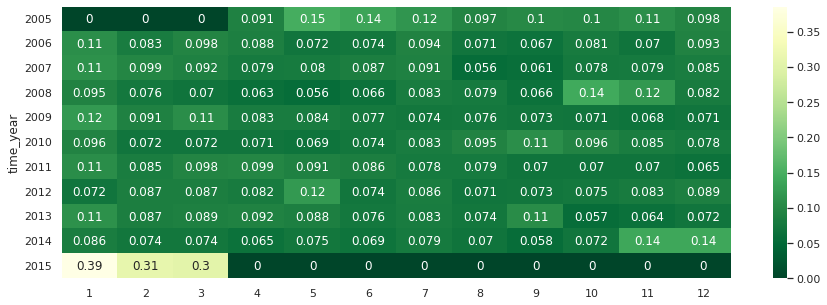

In [277]:
# heatmap으로 비율을 시각화해서 알아보자.
total = []
for i in range(11):
    total.append(x.values[i] / x.sum(axis=1).values[i])

x = pd.DataFrame(total, index=x.index, columns = [str(i) for i in range(1, 13)])
sns.heatmap(x, annot=True, cmap='YlGn_r')

- 밝을 수록 해당 년도에 영화 시청 횟수 비율이 높다. 위에서 봤듯이 대체적으로 1월이 많아보인다.

### 4.3 시대별 많이 본 장르
- 연도와 월을 시대별이라고 정의

In [15]:
import time
def time_convert(old_time):
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    return new_time

In [16]:
df = train_df.copy()
df['time'] = train_df['time'].apply(lambda x: time_convert(x))

genre_df = pd.merge(df, genre_data, on=['item'])
tmp_genre_df = genre_df.copy()
#tmp_genre_df['cnt'] = 1
tmp_genre_df.drop('user', axis=1, inplace=True)
tmp_genre_df.drop('item', axis=1, inplace=True)
year_genre = tmp_genre_df.groupby(['time', 'genre']).size().unstack()


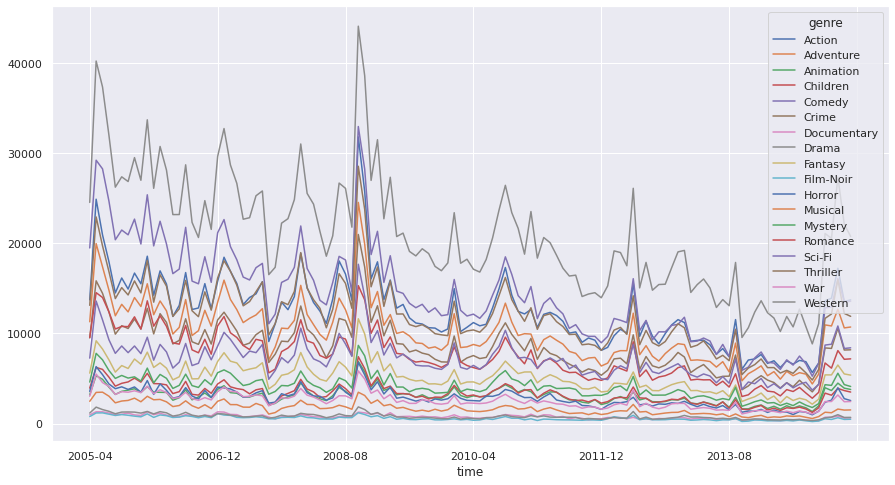

In [286]:
year_genre.plot(figsize=(15, 8))

- Drama 장르가 위 분석결과처럼 많은 비율을 차지해서 그런지, 모든 년도에 골고루 제일 많이 시청되었다.
- 경향성이 너무 비슷해보인다. (늘어난곳과 줄어든 구간이 거의 똑같다.)

### 4.4 시대별 많이 본 영화

In [22]:
#condition = (df.time == '2005-04') & (df.item == 1)
#df.loc[condition,:]

In [29]:
year_item = df.groupby(['time', 'item']).size().unstack()
year_item.head(3)

item,1,2,3,4,5,6,7,8,9,10,...,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
time,,,,,,,,,,,,,,,,,,,,,
2005-04,134.0,26.0,15.0,NaN,6.0,59.0,13.0,1.0,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05,210.0,56.0,11.0,1.0,20.0,130.0,22.0,3.0,NaN,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06,166.0,45.0,15.0,NaN,14.0,83.0,21.0,2.0,NaN,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
import re
def extract_num(x):
    return int(re.findall(r'\d+', str(x))[0])

In [25]:
# 최대 item의 이름과 값 고르기
maxValueIndex = year_item.idxmax(axis = 1)
a = pd.DataFrame(maxValueIndex)
maxValueIndex = year_item.max(axis = 1)
b = pd.DataFrame(maxValueIndex)

t = pd.concat([a, b], axis=1)
t.columns = ['item', 'cnt']
t['item'] = t['item'].apply(lambda x: extract_num(x)) #쓸데없는 글자 지우기
t = t.reset_index()

In [27]:
# 시대별 많이 본 영화 목록 개수와 함께 확인하기
all_df = pd.merge(t, title_data, how='left', on='item')
all_df['title'].value_counts().head(10)
# 총 56개 영화

Inception (2010)           16
Matrix, The (1999)          9
Dark Knight, The (2008)     8
Gravity (2013)              5
Avatar (2009)               5
Batman Begins (2005)        4
Django Unchained (2012)     4
Interstellar (2014)         3
Avengers, The (2012)        3
V for Vendetta (2006)       3
Name: title, dtype: int64

In [43]:
top_7 = ['Inception (2010)', 'Matrix, The (1999)', 'Dark Knight, The (2008)',
         'Gravity (2013)', 'Avatar (2009)', 'Batman Begins (2005)', 'Django Unchained (2012)']
top_7_number = [79132, 2571, 58559, 104841, 72998, 33794, 99114]

top_7_df = year_item[top_7_number]
top_7_df.columns = top_7

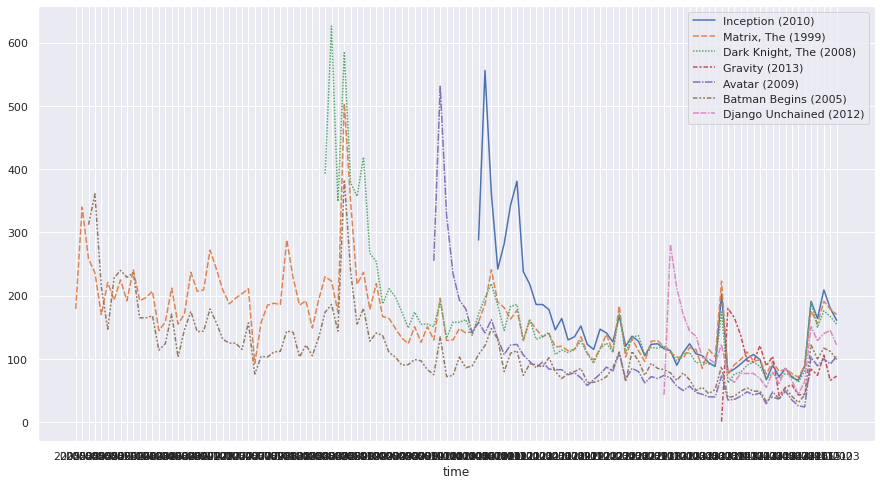

In [51]:
# 시대별 많이 본 영화 top7에서 나온 영화들을 시대 흐름별로 시청 횟수 보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=top_7_df)

- 인셉션,매트릭스 순으로 영화가 시대별로 많이 시청되었다.
- 보통 개봉 후 급 상승하고 시간이 지나면서 다른 영화들과 비슷한 시청횟수를 보인다.

### 4.5 시간대별 많이 본 장르
- 오전이나 오후 타임에는 밝은 영화를 보고, 저녁이나 늦은 시간대에 무서운 영화를 볼 것이라 추측.

In [55]:
genre_df = pd.merge(df, genre_data, on=['item'])
tmp_genre_df = genre_df.copy()
#tmp_genre_df['cnt'] = 1
tmp_genre_df.drop('user', axis=1, inplace=True)
tmp_genre_df.drop('item', axis=1, inplace=True)
hour_genre = tmp_genre_df.groupby(['time_hour', 'genre']).size().unstack()


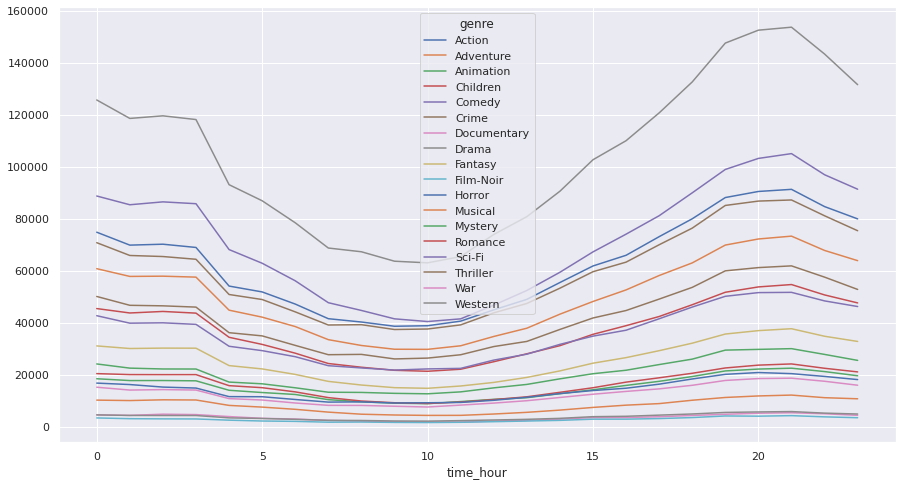

In [56]:
hour_genre.plot(figsize=(15, 8))

- 역시 Drrama가 제일 많다.
- 오전~오후시간대로 갈수록 Comedy, Action, Thriller의 영화 시청 차이 수가 줄어든다. 
- Animation, Horror, War, Musical도 오전~오후 시간대로 갈수록 영화 시청 차이 수가 줄어든다.
- 나머지는 거의 비슷한 경향.
> 예상과 달리 시간대에 따른 영화 장르 시청 선호는 큰 차이가 없다.

In [72]:
# 위 라벨이 많아서 장르 식별이 어려워서 비교용.
#x = pd.concat([pd.DataFrame(hour_genre.columns.values),
#           pd.DataFrame(hour_genre.values[0])], axis=1)
#x.columns = ['genre', 'cnt']
#x.sort_values('cnt', ascending=False)

### 4.6 시간대별 많이 본 영화

In [80]:
hour_item = df.groupby(['time_hour', 'item']).size().unstack()
hour_item.head()

item,1,2,3,4,5,6,7,8,9,10,...,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
time_hour,,,,,,,,,,,,,,,,,,,,,
0,635.0,176.0,38.0,5.0,25.0,259.0,49.0,2.0,3.0,209.0,...,15.0,8.0,1.0,NaN,19.0,2.0,2.0,3.0,9.0,2.0
1,631.0,175.0,37.0,2.0,29.0,225.0,41.0,4.0,4.0,184.0,...,15.0,8.0,2.0,4.0,9.0,5.0,3.0,3.0,11.0,3.0
2,612.0,169.0,51.0,6.0,42.0,198.0,53.0,4.0,2.0,204.0,...,16.0,8.0,3.0,2.0,9.0,8.0,7.0,4.0,9.0,5.0
3,624.0,163.0,39.0,4.0,43.0,193.0,41.0,3.0,2.0,189.0,...,20.0,9.0,1.0,1.0,4.0,4.0,6.0,5.0,8.0,3.0
4,472.0,119.0,37.0,2.0,24.0,172.0,33.0,2.0,1.0,136.0,...,11.0,8.0,4.0,3.0,3.0,4.0,6.0,3.0,5.0,3.0


In [81]:
# 최대 item의 이름과 값 고르기
maxValueIndex = hour_item.idxmax(axis = 1)
a = pd.DataFrame(maxValueIndex)
maxValueIndex = hour_item.max(axis = 1)
b = pd.DataFrame(maxValueIndex)

t = pd.concat([a, b], axis=1)
t.columns = ['item', 'cnt']
t['item'] = t['item'].apply(lambda x: extract_num(x)) #쓸데없는 글자 지우기
t = t.reset_index()

In [82]:
# 시간대별 많이 본 영화 목록 개수와 함께 확인하기
all_df = pd.merge(t, title_data, how='left', on='item')
all_df['title'].value_counts().head(10)
# 총 3개 영화

Matrix, The (1999)                  22
Shawshank Redemption, The (1994)     1
Pulp Fiction (1994)                  1
Name: title, dtype: int64

In [92]:
#all_df.item.value_counts()

2571    22
318      1
296      1
Name: item, dtype: int64

In [93]:
top_3 = ['Matrix, The (1999)', 'Shawshank Redemption, The (1994)', 'Pulp Fiction (1994)']
top_3_number = [2571, 318, 296]

top_3_df = hour_item[top_3_number]
top_3_df.columns = top_3

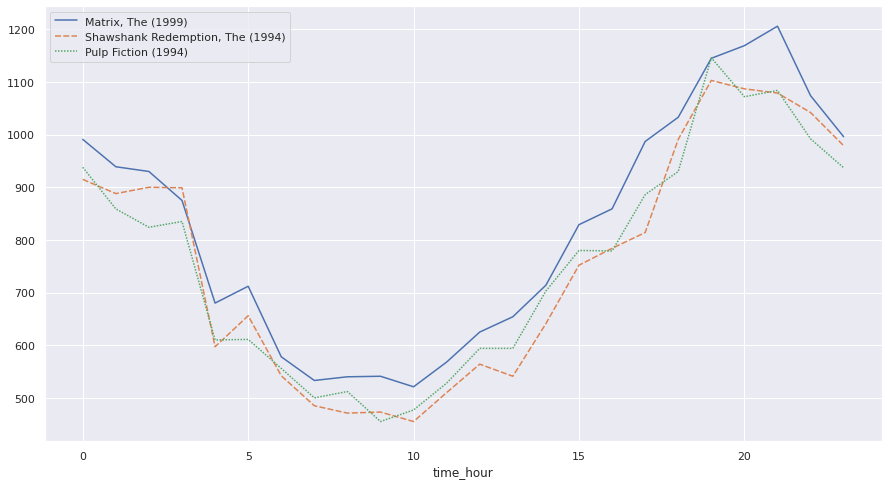

In [94]:
# 시대별 많이 본 영화 top7에서 나온 영화들을 시대 흐름별로 시청 횟수 보기
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
sns.lineplot(data=top_3_df)

- 4.4 시대별에 많이 본 영화인 Inception은 왜 해당되지 않을가 생각해보니, matrix는 inception보다 훨씬 이전에 개봉되어서 시간대별 시청횟수가 기록되어 matrix가 가장 많음 알 수 있었다.
- 이를 통해 대체로 2000년대 이전에 개봉한 영화들이 시간대별 가장 많은 영화 시청을 보인다.
> 거의 모든 시간대에 matrix가 많이 시청되었다.